In [35]:
import h5py
from ipywidgets import interact
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import scipy
from scipy import misc
from scipy import stats


In [2]:
f = h5py.File("/Users/cad/Documents/ci01_imStacks.h5")

In [3]:
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)

001
002
003
004
005
006
007
008
009


In [4]:
dSet='001'
dsDim=f[dSet].shape
imCount=dsDim[0]
imLength=dsDim[1]
imWidth=dsDim[2]
print(imCount)

1225


In [5]:
def browse_images():
    n = imCount
    def view_image(ind):
        imArray=f[dSet][ind,1:imLength,1:imWidth]
        Y=scipy.misc.imresize(imArray, 20, interp='nearest')
#         Y=imArray
        plt.imshow(np.matrix.transpose(Y), cmap=plt.cm.jet,vmin=10, vmax=300,\
                   interpolation='nearest')
        plt.xticks([])
        plt.yticks([])
        plt.show()
    interact(view_image, ind=(0,n-1),continuous_update=True)

In [6]:
browse_images()

A Jupyter Widget

Various Python Image Stuff:<br />
https://matplotlib.org/examples/color/colormaps_reference.html

https://www.safaribooksonline.com/library/view/programming-computer-vision/9781449341916/ch01.html

http://pillow.readthedocs.io/en/4.3.x/reference/Image.html

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imresize.html

https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html

Python HDF5 links:<br />
http://neondataskills.org/self-paced-tutorial/Python-HDF5-basics

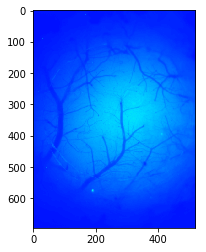

In [11]:
# Stack mean

a=np.mean(f[dSet][0:imCount-1,0:imLength-1,0:imWidth-1],axis=0)
a.shape

plt.imshow(a, cmap=plt.cm.jet,vmin=0, vmax=700,interpolation='nearest')

plt.show()

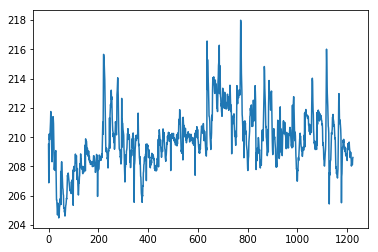

In [60]:
# plot roi mean
roiS=[395,405,195,405]
a=np.mean(np.mean(f[dSet][0:imCount-1,roiS[0]:roiS[1],roiS[2]:roiS[3]],axis=1),axis=1)
a.shape

plT=plt.plot(a)

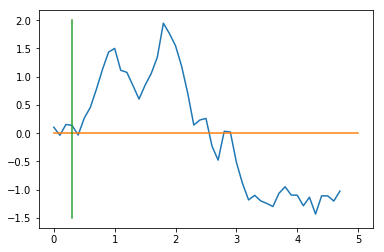

In [77]:
pltTrial=1
trSize=49
tM=np.arange(0.0,4.80,0.1)
difT=a[0+(49*(pltTrial-1)):48+(49*(pltTrial-1))]-a[0+(49*(pltTrial)):48+(49*(pltTrial))]
pltD=stats.zscore(difT)

tPlot,=plt.plot(tM,pltD)
tPlot2,=plt.plot([0,5],[0,0])
tPlot3,=plt.plot([0.3,0.3],[-1.5,2])

